# **Importing Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import date
from pandas.tseries.offsets import MonthEnd
import pandas_profiling as pp
import seaborn
import os
import tensorflow as tf
import cv2
import random
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from sklearn.manifold import TSNE
import seaborn as sns
import statistics
import pandas_profiling
from pandas_profiling import ProfileReport
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
import random
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from scipy import stats as s
import imblearn
from imblearn.over_sampling import SMOTE

# **Reading data**

In [ ]:
covid_19_india = pd.read_csv("/content/drive/MyDrive/COVID-19/covid_19_india.csv",na_values=['-',''])
covid_vaccine_statewise = pd.read_csv("/content/drive/MyDrive/COVID-19/covid_vaccine_statewise.csv",na_values=['-',''])

# **About data**

In [ ]:
covid_19_india.info() #giving information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sno                       18110 non-null  int64  
 1   Date                      18110 non-null  object 
 2   Time                      18110 non-null  object 
 3   State/UnionTerritory      18110 non-null  object 
 4   ConfirmedIndianNational   446 non-null    float64
 5   ConfirmedForeignNational  446 non-null    float64
 6   Cured                     18110 non-null  int64  
 7   Deaths                    18110 non-null  int64  
 8   Confirmed                 18110 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [ ]:
covid_19_india.describe() #describing the nature of numeric column in the data

,Sno,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
count,18110.000000,446.000000,446.000000,1.811000e+04,18110.000000,1.811000e+04
mean,9055.500000,12.188341,1.495516,2.786375e+05,4052.402264,3.010314e+05
std,5228.051023,21.582253,3.576292,6.148909e+05,10919.076411,6.561489e+05
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,4528.250000,1.000000,0.000000,3.360250e+03,32.000000,4.376750e+03
50%,9055.500000,3.000000,0.000000,3.336400e+04,588.000000,3.977350e+04
75%,13582.750000,13.000000,1.000000,2.788698e+05,3643.750000,3.001498e+05
max,18110.000000,177.000000,14.000000,6.159676e+06,134201.000000,6.363442e+06


In [ ]:
# Get  columns whose data type is object i.e. string
filteredColumns = covid_19_india.dtypes[covid_19_india.dtypes == np.object]
listOfColumnNames = list(filteredColumns.index)
for i in listOfColumnNames:
  if i == "Date":
    print( "\033[1m" +"The range of column ",i," is "+ "\033[0m")
    print("\033[1m" +"The start data is : "+ "\033[0m",covid_19_india["Date"][0])
    print("\033[1m" +"The end data is : "+ "\033[0m",covid_19_india["Date"][covid_19_india.shape[0]-1])
  else:
    print("\033[1m" +"The values of the column ",i," is "+ "\033[0m")
    print(covid_19_india[i].unique())


The range of column  Date  is 
The start data is :  2020-01-30
The end data is :  2021-08-11
The values of the column  Time  is 
['6:00 PM' '10:00 AM' '7:30 PM' '9:30 PM' '8:30 PM' '5:00 PM' '8:00 AM']
The values of the column  State/UnionTerritory  is 
['Kerala' 'Telengana' 'Delhi' 'Rajasthan' 'Uttar Pradesh' 'Haryana'
 'Ladakh' 'Tamil Nadu' 'Karnataka' 'Maharashtra' 'Punjab'
 'Jammu and Kashmir' 'Andhra Pradesh' 'Uttarakhand' 'Odisha' 'Puducherry'
 'West Bengal' 'Chhattisgarh' 'Chandigarh' 'Gujarat' 'Himachal Pradesh'
 'Madhya Pradesh' 'Bihar' 'Manipur' 'Mizoram'
 'Andaman and Nicobar Islands' 'Goa' 'Unassigned' 'Assam' 'Jharkhand'
 'Arunachal Pradesh' 'Tripura' 'Nagaland' 'Meghalaya'
 'Dadra and Nagar Haveli and Daman and Diu'
 'Cases being reassigned to states' 'Sikkim' 'Daman & Diu' 'Lakshadweep'
 'Telangana' 'Dadra and Nagar Haveli' 'Bihar****' 'Madhya Pradesh***'
 'Himanchal Pradesh' 'Karanataka' 'Maharashtra***']


In [ ]:
covid_vaccine_statewise.info() #full info od data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Updated On                           7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [ ]:

covid_vaccine_statewise.describe()

,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),Sputnik V (Doses Administered),AEFI,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
count,7.621000e+03,7.621000e+03,7621.000000,7.621000e+03,7.621000e+03,7.461000e+03,7.461000e+03,7461.000000,7.621000e+03,7.621000e+03,2995.000000,5438.000000,1.702000e+03,1.702000e+03,1.702000e+03,3.733000e+03,3.734000e+03,3.734000e+03,1.600000e+02,1.600000e+02,160.000000,5.919000e+03
mean,9.188171e+06,4.792358e+05,2282.872064,7.414415e+06,1.773755e+06,3.620156e+06,3.168416e+06,1162.978019,1.044669e+06,8.126553e+06,9655.570618,1139.402538,8.773958e+06,7.442161e+06,5.641605e+06,1.395895e+06,2.916515e+06,2.627444e+06,4.461687e+07,3.951018e+07,12370.543750,4.547842e+06
std,3.746180e+07,1.911511e+06,7275.973730,2.995209e+07,7.570382e+06,1.737938e+07,1.515310e+07,5931.353995,4.452259e+06,3.298414e+07,43882.536177,3454.608046,2.660829e+07,2.225999e+07,1.681650e+07,5.501454e+06,9.567607e+06,8.192225e+06,3.950749e+07,3.417684e+07,12485.026753,1.834182e+07
min,7.000000e+00,0.000000e+00,0.000000,7.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000,0.000000e+00,7.000000e+00,0.000000,0.000000,2.662400e+04,1.681500e+04,9.994000e+03,1.059000e+03,1.136000e+03,5.580000e+02,2.375700e+04,2.451700e+04,2.000000,7.000000e+00
25%,1.356570e+05,6.004000e+03,69.000000,1.166320e+05,1.283100e+04,5.655500e+04,5.210700e+04,8.000000,0.000000e+00,1.331340e+05,0.000000,109.250000,4.344842e+05,2.326275e+05,1.285605e+05,5.655400e+04,9.248225e+04,5.615975e+04,5.739350e+06,5.023407e+06,1278.750000,7.427550e+04
50%,8.182020e+05,4.547000e+04,597.000000,6.614590e+05,1.388180e+05,3.897850e+05,3.342380e+05,113.000000,1.185100e+04,7.567360e+05,0.000000,294.000000,3.095970e+06,2.695938e+06,1.805696e+06,2.947270e+05,8.330395e+05,7.887425e+05,3.716590e+07,3.365402e+07,8007.500000,4.022880e+05
75%,6.625243e+06,3.428690e+05,1708.000000,5.387805e+06,1.166434e+06,2.735777e+06,2.561513e+06,800.000000,7.579300e+05,6.007817e+06,2519.000000,808.000000,7.366241e+06,6.969726e+06,5.294763e+06,9.105160e+05,2.499280e+06,2.337874e+06,7.441663e+07,6.685368e+07,19851.000000,3.501562e+06
max,5.132284e+08,3.501031e+07,73933.000000,4.001504e+08,1.130780e+08,2.701636e+08,2.395186e+08,98275.000000,6.236742e+07,4.468251e+08,588039.000000,26542.000000,2.243304e+08,1.667575e+08,1.186927e+08,9.224315e+07,9.096888e+07,6.731098e+07,1.349420e+08,1.156684e+08,46462.000000,2.506569e+08


In [ ]:
covid_vaccine_statewise.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),Sputnik V (Doses Administered),AEFI,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [ ]:
# Get  columns whose data type is object i.e. string
filteredColumns = covid_vaccine_statewise.dtypes[covid_vaccine_statewise.dtypes == np.object]
listOfColumnNames = list(filteredColumns.index)
for i in listOfColumnNames:
  if i == "Updated On":
    print( "\033[1m" +"The range of column ",i," is "+ "\033[0m")
    print("\033[1m" +"The start data is : "+ "\033[0m",covid_vaccine_statewise["Updated On"][0])
    print("\033[1m" +"The end data is : "+ "\033[0m",covid_vaccine_statewise["Updated On"][covid_vaccine_statewise.shape[0]-1])
  else:
    print("\033[1m" +"The values of the column ",i," is "+ "\033[0m")
    print(covid_vaccine_statewise[i].unique())

The range of column  Updated On  is 
The start data is :  16/01/2021
The end data is :  15/08/2021
The values of the column  State  is 
['India' 'Andaman and Nicobar Islands' 'Andhra Pradesh'
 'Arunachal Pradesh' 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh'
 'Dadra and Nagar Haveli and Daman and Diu' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Ladakh' 'Lakshadweep' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal']


# **Processing data in order to plot graph w.r.t dates**

**Converting date column to a 'Datetime' object.**

In [ ]:
covid_19_india['Date'] = pd.to_datetime(covid_19_india['Date']) #changing type of date column to datetime

**Grouping data by 'Date' to find cumulative sum of cases in India.**

In [ ]:
data = covid_19_india.groupby(by=['Date']).sum().diff()

In [ ]:
data.fillna(0,inplace=True)

**Making date column as index of dataframe**

In [ ]:
covid_19_india = pd.read_csv("/content/drive/MyDrive/COVID-19/covid_19_india.csv",na_values=['-',''],parse_dates=[['Date','Time']],index_col='Date_Time')
covid_19_india = covid_19_india[['State/UnionTerritory','ConfirmedIndianNational','ConfirmedForeignNational','Cured','Deaths','Confirmed']]

# **Use the file covid_19_india.csv and show the trend of confirmed, and cured cases along with the number of deaths in India for the time period of the data in one plot.**

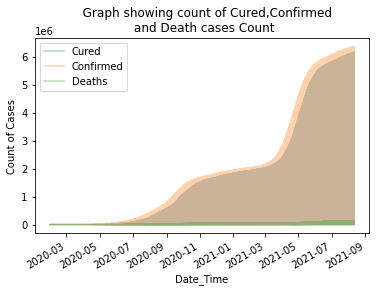

In [ ]:
covid_19_india['Cured'].plot(alpha=0.35,label='Cured',kind='line')
covid_19_india['Confirmed'].plot(alpha=0.35,label='Confirmed',kind='line')
covid_19_india['Deaths'].plot(alpha=0.35,label='Deaths',kind='line')
plt.ylabel("Count of Cases")
plt.title("   Graph showing count of Cured,Confirmed\n and Death cases Count in India")
plt.legend()

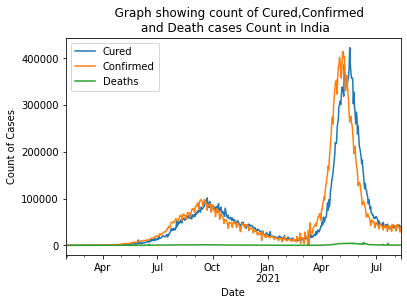

In [ ]:
data['Cured'].plot(label='Cured',kind='line')
data['Confirmed'].plot(label='Confirmed',kind='line')
data['Deaths'].plot(label='Deaths',kind='line')
plt.ylabel("Count of Cases")
plt.title("   Graph showing count of Cured,Confirmed\n and Death cases Count in India")
plt.legend()

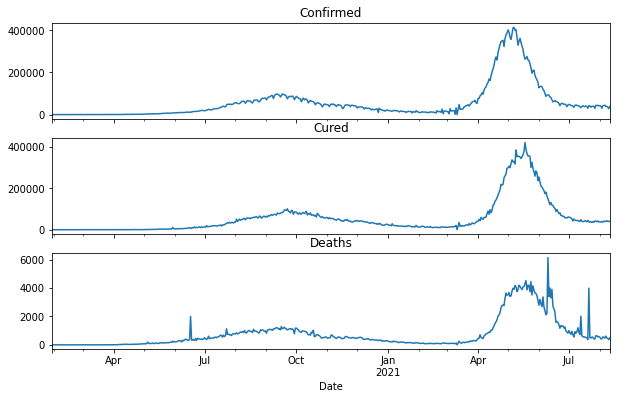

In [ ]:
figure, axes = plt.subplots(3,sharex=True)
data['Confirmed'].plot(ax=axes[0],figsize=(10,6),title='Confirmed')
data['Cured'].plot(ax=axes[1],figsize=(10,6),title='Cured')
data['Deaths'].plot(ax=axes[2],figsize=(10,6),title='Deaths')



# **Use the file covid_vaccine_statewise.csv and plot the total number of doses administered of Covishield, Covaxin, and Sputnik in the following cities: Kerala,Delhi,Rajasthan, Haryana, Uttar Pradesh, Tamil Nadu for the time period of the data.**

**Converting into datetime object**

In [ ]:
covid_vaccine_statewise = covid_vaccine_statewise.rename(columns= {'Updated On':'Date',' Covaxin (Doses Administered)':'Covaxin','CoviShield (Doses Administered)':'CoviShield','Sputnik V (Doses Administered)':'Sputnik'})
covid_vaccine_statewise['Date'] = pd.to_datetime(covid_vaccine_statewise['Date'])

In [ ]:
covid_vaccine_statewise.head()

,Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin,CoviShield,Sputnik,AEFI,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,2021-01-16,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,2021-01-17,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,2021-01-18,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,2021-01-19,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,2021-01-20,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


**Grouping w.r.t to states**

In [ ]:
covid_statewise = covid_vaccine_statewise.groupby(['State'])['Covaxin','CoviShield','Sputnik'].sum().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
covid_statewise

,State,Covaxin,CoviShield,Sputnik
0,Andaman and Nicobar Islands,0.000000e+00,2.051143e+07,0.0
1,Andhra Pradesh,2.636952e+08,1.323987e+09,1412491.0
2,Arunachal Pradesh,1.820000e+03,6.080052e+07,0.0
3,Assam,1.187203e+08,5.970823e+08,37342.0
4,Bihar,1.568075e+08,1.582600e+09,61096.0
5,Chandigarh,1.176780e+05,5.614530e+07,0.0
6,Chhattisgarh,5.730956e+07,9.095543e+08,108656.0
7,Dadra and Nagar Haveli and Daman and Diu,1.072000e+03,3.817282e+07,0.0
8,Delhi,2.186920e+08,5.920689e+08,1017693.0
9,Goa,1.469705e+06,9.065506e+07,0.0


In [ ]:
states = ["Kerala","Delhi","Rajasthan","Haryana","Uttar Pradesh","Tamil Nadu"]
data_statewise = covid_statewise[covid_statewise.State.isin(states)] #getting of the particular states only
  

In [ ]:
data_statewise

,State,Covaxin,CoviShield,Sputnik
8,Delhi,218692040.0,5.920689e+08,1017693.0
11,Haryana,129521424.0,7.829140e+08,1001912.0
17,Kerala,121110027.0,1.434198e+09,582603.0
29,Rajasthan,246809265.0,2.442166e+09,228872.0
31,Tamil Nadu,240280582.0,1.337449e+09,775724.0
34,Uttar Pradesh,381441691.0,2.955199e+09,369784.0


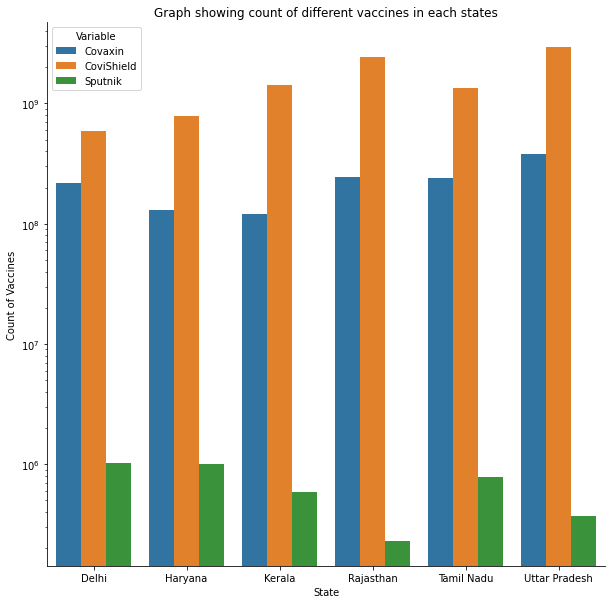

In [ ]:
#plotting graph showise statewise count of diff
fig, ax1 = plt.subplots(figsize=(10, 10))
tidy = data_statewise.melt(id_vars='State').rename(columns=str.title)
seaborn.barplot(x='State', y='Value', hue='Variable', data=tidy, ax=ax1)
plt.yscale('log')
plt.ylabel("Count of Vaccines")
plt.title("Graph showing count of different vaccines in each states")
seaborn.despine(fig)

# **Face Mask Dataset**

# **Randomly select 5 images from each class and visualise them as images.**

In [ ]:
#printing images
def show_image(file_path):
  plt.figure(figsize=(20,20))
  for i in range(5):
    file = random.choice(os.listdir(file_path))
    image_path= os.path.join(file_path, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

#reading images form the path
with_mask_image_path = '/content/drive/MyDrive/Mask Dataset/with_mask'
without_mask_image_path = '/content/drive/MyDrive/Mask Dataset/without_mask'


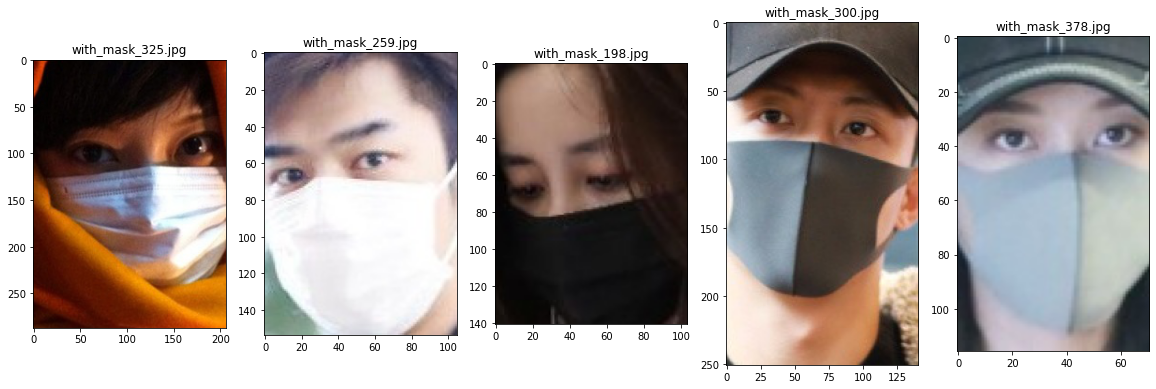

In [ ]:
show_image(with_mask_image_path)

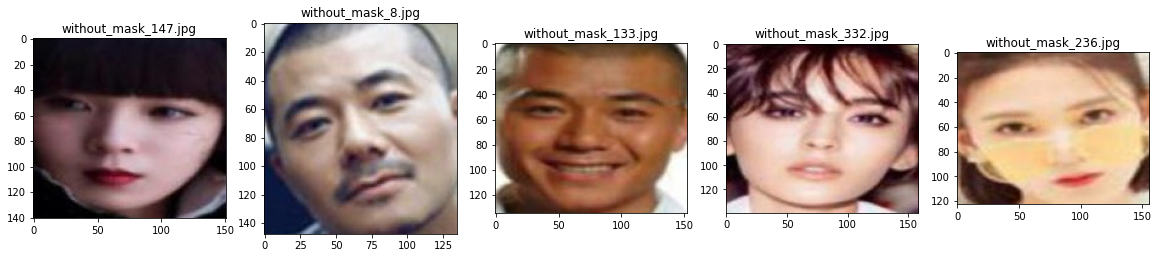

In [ ]:
show_image(without_mask_image_path)

# **We can visualize only 2D or 3D data using scatter plots. For features dimensions higher than three, we may use T-distributed Stochastic Neighbor Embedding (t-SNE) to reduce the number of features. Use the t-SNE to reduce the dataset to 2 dimensions and visualize the scatter plot. What is your inference regarding the class separation?**

In [ ]:
#defining size
IMG_WIDTH=28
IMG_HEIGHT=28
img_folder=r'/content/drive/MyDrive/Mask Dataset'

In [ ]:
#function to create daatset from the images
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
            #reading each images
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.IMREAD_GRAYSCALE)
            #resizing of images
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name = create_dataset(r'/content/drive/MyDrive/Mask Dataset')

In [ ]:
x = np.array(img_data, np.float32)
image_data = x.reshape(x.shape[0],-1)

In [ ]:
#the t-SNE to reduce the dataset to 2 dimensions
tsne_results = TSNE(n_components=2, perplexity=30.0, n_iter=1000, verbose=1).fit_transform(image_data)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.060s...
[t-SNE] Computed neighbors for 1000 samples in 1.597s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.090164
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.237732
[t-SNE] KL divergence after 1000 iterations: 1.342960


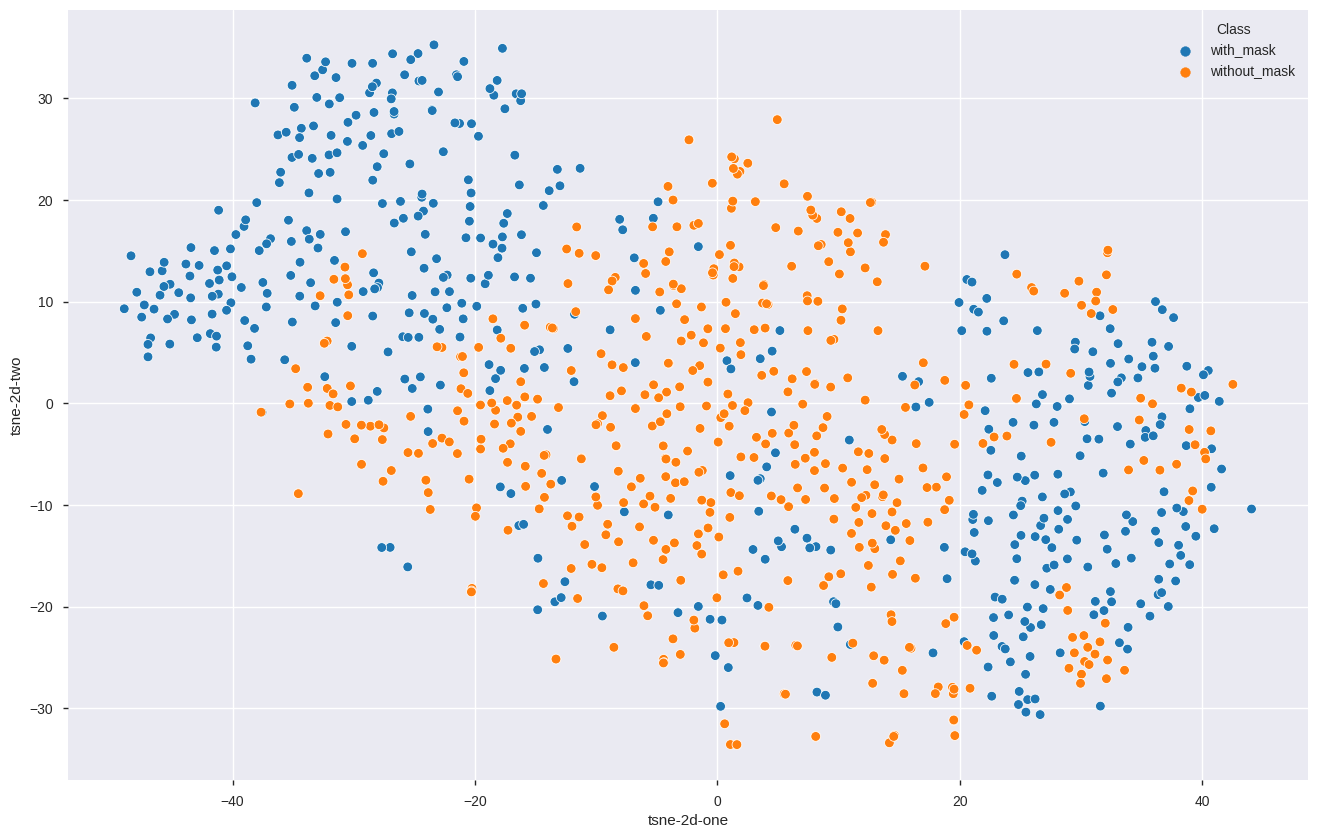

In [ ]:
#plotting scatter plot
tsne_2d_one = tsne_results[:,0]
tsne_2d_two = tsne_results[:,1]
dict = {'tsne-2d-one': tsne_2d_one, 'tsne-2d-two': tsne_2d_two, 'Class': class_name} 
df = pd.DataFrame(dict)
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Class",
    data=df,
    legend="full")

# **Take the Complexity parameter as a hyperparameter, and perform a grid search for finding its optimal value. You have to perform grid search for at least 10 values of the Complexity parameter. You have to implement calculating sum of impurity value of all leaf nodes for each complexity parameter value.**

# Loading Dataset

In [ ]:
bank_data = pd.read_csv('/content/drive/MyDrive/bank-additional/bank-additional/bank-additional-full.csv',delimiter=";",na_values=['-',''])

In [ ]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
Counter(bank_data['y'])

Counter({'no': 36548, 'yes': 4640})

In [ ]:
obj_col = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

In [ ]:
cols = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
labels  = bank_data['y']
bank_data.drop(['y'],inplace=True,axis='columns')
one_hot_encoded_data = pd.get_dummies(bank_data)
data = bank_data.drop(cols,inplace=False,axis='columns')
result = pd.concat([data, one_hot_encoded_data], axis=1, join='inner')

In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 73 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  age                            41188 non-null  int64  
 11  duration                       41188 non-null  int64  
 12  campaign                       41188 non-null 

In [ ]:
result

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1


In [ ]:
def split_train_test(X,y,test_ratio):
    r = test_ratio*100
    #have random indices
    arr_rand = np.random.rand(X.shape[0])
    #select indices of given ratio
    split = arr_rand < np.percentile(arr_rand, r)
    #spliting of data
    X_test = X[split]
    y_test = y[split]
    X_train =  X[~split]
    y_train = y[~split]

    return X_train, X_test, y_train, y_test

In [ ]:
#spliting of data
train_data,test_data,train_label,test_label = split_train_test(result,labels,0.30)
test_label = test_label.tolist()

In [ ]:
#normalization of data
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std 

In [ ]:
len(train_data)

28831

In [ ]:
len(train_label)

28831

In [ ]:
#function to find sum of impurity of leaves
def sum_impurity(clf):
  n_nodes = clf.tree_.node_count
  children_left = clf.tree_.children_left
  children_right = clf.tree_.children_right
  impurity = clf.tree_.impurity
  
  node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
  is_leaves = np.zeros(shape=n_nodes, dtype=bool)
  stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
  while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True
  sum = 0
  for i in range(n_nodes):
    if is_leaves[i]:
      sum = sum + impurity[i]
  return sum




In [ ]:
alphas = [0.00,0.010,0.020,0.030,0.040,0.050,0.060,0.070,0.080,0.090]
#alphas = [1.38458132e-05,2.54527490e-05,3.14331796e-05,4.27780283e-05,5.54958205e-05,6.65949846e-05,7.70775284e-05,8.69186772e-05,1.07672609e-03,2.23580553e-03]

In [ ]:
def sum_model(x_train,x_test,y_train,y_test,val):
  undersample = RandomUnderSampler(sampling_strategy='majority')
  X, y = undersample.fit_sample(x_train, y_train)
  clf = DecisionTreeClassifier(ccp_alpha=val)
  clf.fit(X,y)
  sum = sum_impurity(clf)
  pred_label = clf.predict(x_test).tolist()
  pred_train = clf.predict(X).tolist()
  curr_accuracy = acc_score(pred_label,y_test)
  train_acc = acc_score(pred_train,y)
  return curr_accuracy,train_acc,sum

train_acc = []
test_acc = []
imp_leaf = []
for i in alphas:
  print("For val i : ",i)
  acc_test ,acc_train, sum_imp_leaf = sum_model(train_data,test_data,train_label,test_label,i)
  # print("For Alpha : ",i)
  #print("Testing acc : ",acc)
  print("Sum : ",sum_imp_leaf)
  test_acc.append(acc_test)
  train_acc.append(acc_train)
  imp_leaf.append(sum_imp_leaf)


For val i :  0.0
Sum :  0.0
For val i :  0.01


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Sum :  2.0291295832350245
For val i :  0.02
Sum :  1.4499935912420425
For val i :  0.03


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Sum :  1.2818995053949362
For val i :  0.04
Sum :  1.4124122665952565
For val i :  0.05


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Sum :  1.0957425853774432
For val i :  0.06
Sum :  0.7633148302656187
For val i :  0.07


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Sum :  0.759275068519552
For val i :  0.08
Sum :  0.7678713286184927
For val i :  0.09


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Sum :  0.7547149757934406


In [ ]:
test_acc 

[83.82971835545484,
 80.42246681774037,
 85.04370346390418,
 84.24247329232762,
 83.50598899320168,
 61.05535772094529,
 66.79346066688248,
 68.04791194561346,
 64.28455810942052,
 71.26092586597605]

Text(0.5, 1.0, 'Total Impurity vs effective alpha for Training set')

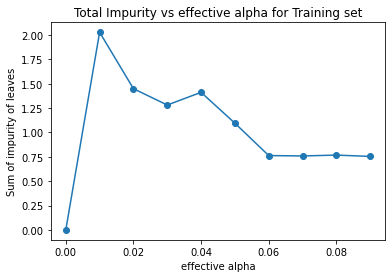

In [ ]:
fig, ax = plt.subplots()
ax.plot(alphas[:],imp_leaf[:],marker='o')
ax.set_xlabel("effective alpha")
ax.set_ylabel("Sum of impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for Training set")

Text(0.5, 1.0, 'Testing Accuracy vs effective alpha ')

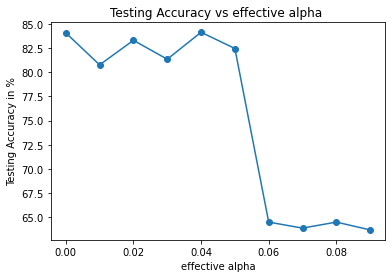

In [ ]:
fig, ax = plt.subplots()
ax.plot(alphas[:],test_acc,marker='o')
ax.set_xlabel("effective alpha")
ax.set_ylabel("Testing Accuracy in %")
ax.set_title("Testing Accuracy vs effective alpha ")

# **For part (1), prepare a table representing train accuracy and testing accuracy for each value of the Complexity parameter. Comment on overfitting, and underfitting for each entry in the table.**

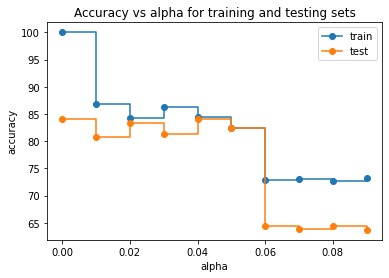

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(alphas, train_acc, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(alphas, test_acc, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
df_data = pd.DataFrame({"ccp_alpha":alphas,"Training accuracy":train_acc,"Testing accuracy":test_acc})

In [ ]:
df_data

,ccp_alpha,Training accuracy,Testing accuracy
0,0.00,100.015335,84.072515
1,0.01,86.811839,80.762383
2,0.02,84.266217,83.303658
3,0.03,86.259776,81.345096
4,0.04,84.511578,84.137261
5,0.05,82.364668,82.453869
6,0.06,72.948934,64.494982
7,0.07,72.964269,63.871803
8,0.08,72.642233,64.494982
9,0.09,73.194295,63.685659


# **Replicate part (2) with sklearn Decision Tree Classifier’s ‘cost complexity pruning path’ function. Is there any deviation between the results from your implementation and the inbuilt function?**

In [ ]:
clf = DecisionTreeClassifier()
undersample = RandomUnderSampler(sampling_strategy='majority')
X, y = undersample.fit_sample(train_data, train_label)
path = clf.cost_complexity_pruning_path(X,y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
ccp_alphas

array([0.00000000e+00, 1.61862810e-05, 1.72971634e-05, 1.73258800e-05,
       1.84638585e-05, 1.96265707e-05, 2.17630669e-05, 2.22974279e-05,
       2.23259048e-05, 2.23259048e-05, 2.23524832e-05, 2.23773470e-05,
       2.24006567e-05, 2.25147517e-05, 2.25727048e-05, 2.25727048e-05,
       2.26094083e-05, 2.26205790e-05, 2.26415240e-05, 2.27313389e-05,
       2.27441887e-05, 2.27619576e-05, 2.28643695e-05, 2.29440085e-05,
       2.29506969e-05, 2.29691035e-05, 2.30131478e-05, 2.30311340e-05,
       2.30418386e-05, 2.30423445e-05, 2.30786190e-05, 2.30897996e-05,
       2.31232585e-05, 2.31232585e-05, 2.31232585e-05, 2.31232585e-05,
       2.32905296e-05, 2.37735947e-05, 2.54355844e-05, 2.57992675e-05,
       2.60136658e-05, 2.60136658e-05, 2.60136658e-05, 2.60136658e-05,
       2.71026100e-05, 2.77479102e-05, 2.77479102e-05, 2.77479102e-05,
       2.77479102e-05, 2.77479102e-05, 2.77479102e-05, 2.77479102e-05,
       2.77479102e-05, 2.77479102e-05, 2.77479102e-05, 2.77479102e-05,
      

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas[-20:-10]:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X,y)
    clfs.append(clf)

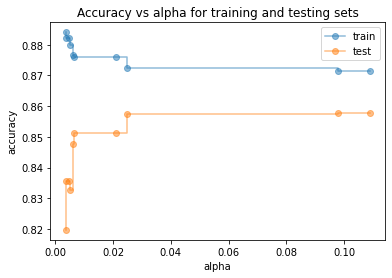

In [ ]:
train_scores = [clf.score(X,y) for clf in clfs]
test_scores = [clf.score(test_data, test_label) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas[-10:], train_scores, marker='o', label="train",
        drawstyle="steps-post",alpha = 0.5)
ax.plot(ccp_alphas[-10:], test_scores, marker='o', label="test",
        drawstyle="steps-post",alpha = 0.5)
ax.legend()
plt.show()

# **Split the data into training and testing set (75:25 ratio) using the function you created in previous question.**

In [ ]:
bj_df = pd.read_csv('/content/drive/MyDrive/PRSA_data_2010.1.1-2014.12.31.csv')

**Handling Null values**

In [ ]:
bj_df.isnull().sum().sort_values(ascending=False)

pm2.5    2067
Ir          0
Is          0
Iws         0
cbwd        0
PRES        0
TEMP        0
DEWP        0
hour        0
day         0
month       0
year        0
No          0
dtype: int64

In [ ]:
bj_df['pm2.5'].describe() #describing column

count    41757.000000
mean        98.613215
std         92.050387
min          0.000000
25%         29.000000
50%         72.000000
75%        137.000000
max        994.000000
Name: pm2.5, dtype: float64

In [ ]:
bj_df = bj_df.fillna(bj_df['pm2.5'].mean()) #filling null values with mean of that column

In [ ]:
bj_df.isnull().sum().sort_values(ascending=False) #finding again null values of each column

Ir       0
Is       0
Iws      0
cbwd     0
PRES     0
TEMP     0
DEWP     0
pm2.5    0
hour     0
day      0
month    0
year     0
No       0
dtype: int64

**Spitting  values**

In [ ]:
bj_data = bj_df.drop(['month','No'],inplace=False,axis='columns')
labels = bj_df['month']

In [ ]:
bj_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    43824 non-null  int64  
 1   day     43824 non-null  int64  
 2   hour    43824 non-null  int64  
 3   pm2.5   43824 non-null  float64
 4   DEWP    43824 non-null  int64  
 5   TEMP    43824 non-null  float64
 6   PRES    43824 non-null  float64
 7   cbwd    43824 non-null  object 
 8   Iws     43824 non-null  float64
 9   Is      43824 non-null  int64  
 10  Ir      43824 non-null  int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 3.7+ MB


In [ ]:
bj_data = bj_data.join(pd.get_dummies(bj_data['cbwd'])) # one-hot encoding
del bj_data['cbwd']

**Checking the count of each month**

In [ ]:
Counter(labels)

Counter({1: 3720,
         2: 3384,
         3: 3720,
         4: 3600,
         5: 3720,
         6: 3600,
         7: 3720,
         8: 3720,
         9: 3600,
         10: 3720,
         11: 3600,
         12: 3720})

In [ ]:
#spliting of data
x_train,x_test,y_train,y_test = split_train_test(bj_data,labels,0.25)
y_test = y_test.tolist()
y_train = y_train.tolist()
x_train.reset_index()
x_test.reset_index()

,index,year,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,NE,NW,SE,cv
0,2,2010,1,2,98.613215,-21,-11.0,1019.0,6.71,0,0,0,1,0,0
1,3,2010,1,3,98.613215,-21,-14.0,1019.0,9.84,0,0,0,1,0,0
2,29,2010,2,5,109.000000,-7,-6.0,1022.0,7.14,3,0,0,0,1,0
3,33,2010,2,9,132.000000,-7,-5.0,1025.0,14.30,0,0,0,0,1,0
4,36,2010,2,12,148.000000,-8,-5.0,1026.0,23.69,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10951,43814,2014,31,14,9.000000,-27,1.0,1032.0,196.21,0,0,0,1,0,0
10952,43815,2014,31,15,11.000000,-26,1.0,1032.0,205.15,0,0,0,1,0,0
10953,43816,2014,31,16,8.000000,-23,0.0,1032.0,214.09,0,0,0,1,0,0
10954,43818,2014,31,18,10.000000,-22,-2.0,1033.0,226.16,0,0,0,1,0,0


In [ ]:
len(x_test)

10956

In [ ]:
#normalization data
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std 

# **Train a decision tree using both gini index and entropy. Don’t change any of other default values of the classifier. In the following models, use the criteria which gives better accuracy on test set.**

In [ ]:
criterion = ['gini', 'entropy']

In [ ]:
def acc_score(x,y):
  correctly_classified = 0 
  for i in range(0,len(y)):
    if x[i] == y[i]:
      correctly_classified = correctly_classified +1
  curr_accuracy = ( correctly_classified / i ) * 100
  return curr_accuracy


In [ ]:
for i in criterion:
  val = i
  print("For criterion : ",i)
  clf = DecisionTreeClassifier(criterion=val)
  clf.fit(x_train,y_train)
  pred_label = clf.predict(x_test).tolist()
  curr_accuracy = acc_score(pred_label,y_test)
  print("Accuracy : ",curr_accuracy)


For criterion :  gini
Accuracy :  82.95755362848014
For criterion :  entropy
Accuracy :  83.41396622546783


# **Train decision trees with different maximum depths [2, 4,8, 10, 12, 30]. Find the best value of depth by using testing and training accuracy. Plot the curve betweentraining and testing accuracy and depth to support your analysis.**

In [ ]:
depths = [2, 4, 8, 10, 12, 30]

In [ ]:
test_acc = []
train_acc = []
for i in depths:
  val = i
  print("For depth : ",i)
  clf = DecisionTreeClassifier(criterion='entropy',max_depth=val)
  clf.fit(x_train,y_train)
  pred_label = clf.predict(x_test).tolist()
  train_pred = clf.predict(x_train).tolist()
  correctly_classified_test = acc_score(pred_label,y_test)
  correctly_classified_train = acc_score(train_pred,y_train) 
  test_acc.append(correctly_classified_test)
  train_acc.append(correctly_classified_train)
  print(" Train Accuracy : ",correctly_classified_train)
  print(" Test Accuracy : ",correctly_classified_test )

For depth :  2
 Train Accuracy :  27.550430523017006
 Test Accuracy :  27.64947512551346
For depth :  4
 Train Accuracy :  40.02494903702802
 Test Accuracy :  39.0963030579644
For depth :  8
 Train Accuracy :  58.44464052088721
 Test Accuracy :  56.56777727065268
For depth :  10
 Train Accuracy :  70.423220859829
 Test Accuracy :  66.04290278411685
For depth :  12
 Train Accuracy :  82.5660997352968
 Test Accuracy :  73.79278868096759
For depth :  30
 Train Accuracy :  100.00304256549121
 Test Accuracy :  83.17663167503423


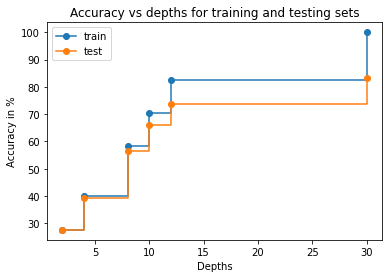

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel("Depths")
ax.set_ylabel("Accuracy in %")
ax.set_title("Accuracy vs depths for training and testing sets")
ax.plot(depths, train_acc, marker='o', label="train",drawstyle="steps-post")
ax.plot(depths, test_acc, marker='o', label="test",drawstyle="steps-post")
ax.legend()
plt.show()

# **Ensembling is a method to combine multiple not-so-good models to get a better performing model (more in upcoming lectures). Create 150 different decision stumps (max depth 4). For each stump, train it on randomly selected 40% of the training data, i.e., select data for each stump separately. Now, predict the test samples’ labels by taking take majority vote of the output of the stumps. How is the performance effected as compared to part (a) and (b)?**

In [ ]:
def creating_stumps(x_train,x_test,y_train,y_test,fold,depth):
  final_label = []
  final_label_train = []
  final_train_label = []
  for i in range(0,fold):
    y_train = np.array(y_train)
    X_train,X_test,Y_train,Y_test = split_train_test(x_train,y_train,0.60)
    clf = DecisionTreeClassifier(criterion='entropy',max_depth=depth)
    clf.fit(X_train,Y_train)
    pred_label_test = clf.predict(x_test).tolist()
    pred_label_train = clf.predict(x_train).tolist()
    final_label.append(pred_label_test)
    final_label_train.append(pred_label_train)
  return final_label,final_label_train
  
final_list, train_acc = creating_stumps(x_train,x_test,y_train,y_test,150,4)


In [ ]:
final_labels = list(map(list, zip(*final_list)))

In [ ]:
final_pred_val = []
for i in range(0,len(final_labels)):
  final_pred_val.append((int(s.mode(final_labels[i])[0])))


In [ ]:
acc = acc_score(final_pred_val,y_test)

In [ ]:
acc

40.319488817891376

# **Now, try to tune the decision stumps by changing the max-depth [5, 7, 13, 15, 25,best achieved from (b)] and number of trees. Analyze the effect on the training and testing accuracy. Use majority vote for final prediction on the test data.**

In [ ]:
final_test_acc = []
final_train_acc = []
depths = [5, 7, 13, 15, 25,30]
trees = [10,50,100,150,200,220,250,300]
for i in depths:
  for j in trees:
    test_acc , train_acc= creating_stumps(x_train,x_test,y_train,y_test,j,i)
    train_acc_final = list(map(list, zip(*train_acc)))
    test_acc_final = list(map(list, zip(*test_acc)))
    final_pred_val = []
    pred_val_train = []
    for k in range(0,len(test_acc_final)):
      final_pred_val.append((int(s.mode(test_acc_final[k])[0])))
    for k in range(0,len(train_acc_final)):
      pred_val_train.append((int(s.mode(train_acc_final[k])[0])))
    acc = acc_score(final_pred_val,y_test)
    train_accr = acc_score(pred_val_train,y_train)
    final_test_acc.append(acc)
    final_train_acc.append(train_accr)

In [ ]:
depths_trees = []
for i in depths:
  for j in trees:
    val = str(i)+"_"+str(j)
    depths_trees.append(val)


In [ ]:
dt_data = pd.DataFrame({"Depths and Trees":depths_trees,"Training Accuracy":final_train_acc,"Testing Accuracy":final_test_acc})

In [ ]:
final_df = dt_data.sort_values(by=['Testing Accuracy'], ascending=False)

In [ ]:
final_df

,Depths and Trees,Training Accuracy,Testing Accuracy
37,25_220,99.796148,91.592880
39,25_300,99.790063,91.501597
36,25_200,99.796148,91.419443
46,30_250,99.793106,91.410315
47,30_300,99.793106,91.401187
45,30_220,99.799191,91.328161
34,25_100,99.686616,91.282519
43,30_150,99.790063,91.273391
35,25_150,99.765722,91.200365
44,30_200,99.768765,91.191237


In [ ]:
final_df[:15]

,Depths and Trees,Training Accuracy,Testing Accuracy
37,25_220,99.796148,91.592880
39,25_300,99.790063,91.501597
36,25_200,99.796148,91.419443
46,30_250,99.793106,91.410315
47,30_300,99.793106,91.401187
45,30_220,99.799191,91.328161
34,25_100,99.686616,91.282519
43,30_150,99.790063,91.273391
35,25_150,99.765722,91.200365
44,30_200,99.768765,91.191237


In [ ]:
top_rank = final_df[:15]

In [ ]:
top_rank

,Depths and Trees,Training Accuracy,Testing Accuracy
39,25_300,100.007607,91.766317
45,30_220,100.007607,91.702419
44,30_200,100.007607,91.702419
37,25_220,100.007607,91.675034
46,30_250,100.007607,91.665906
47,30_300,100.007607,91.592880
43,30_150,100.007607,91.501597
38,25_250,99.984786,91.483341
36,25_200,100.007607,91.419443
33,25_50,100.007607,91.346417


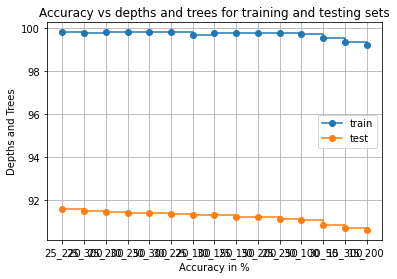

In [ ]:
fig, ax = plt.subplots()
ax.set_ylabel("Depths and Trees")
ax.set_xlabel("Accuracy in %")
ax.set_title("Accuracy vs depths and trees for training and testing sets")
ax.plot( top_rank["Depths and Trees"],top_rank["Training Accuracy"], marker='o', label="train",drawstyle="steps-post")
ax.plot(top_rank["Depths and Trees"],top_rank["Testing Accuracy"],  marker='o', label="test",drawstyle="steps-post")
ax.legend()
plt.grid()
plt.show()
